In [55]:
import pydot 
import pandas as pd
import numpy as np
import seaborn as sns
import os 
import re
sns.set()

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.exceptions import NotFittedError

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier

from IPython.display import display

In [56]:
path_train = '../data/titanic/train.csv'
path_test = '../data/titanic/test.csv'

In [57]:
df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)

In [58]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [59]:
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [60]:
draw_missing_data_table(df_train)

,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


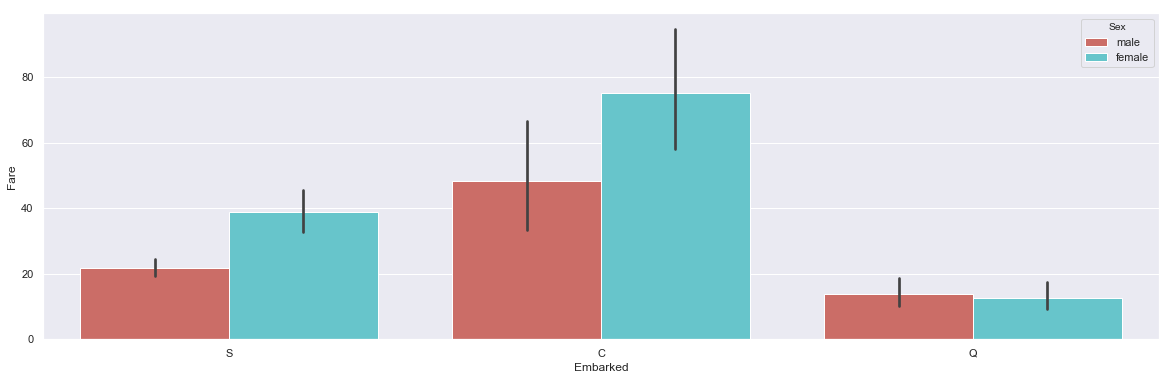

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [61]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6))
plot = sns.catplot(x='Embarked', y='Fare', hue='Sex', data=df_train, palette='hls', kind='bar', ax=ax)
plt.close(plot.fig)
plt.show()
display(df_train[df_train['Embarked'].isnull()])

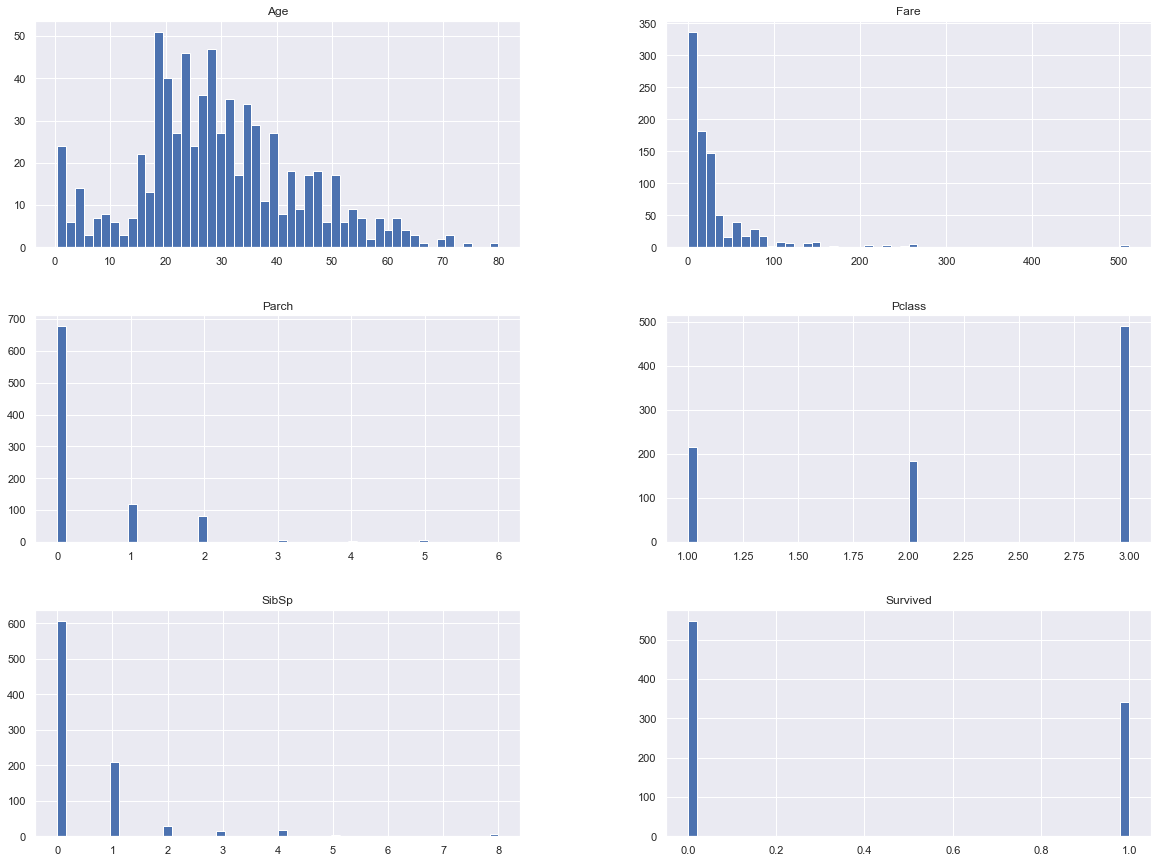

In [62]:
df_train.drop(['PassengerId'], axis=1).hist(bins=50, figsize=(20, 15))
plt.show()

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


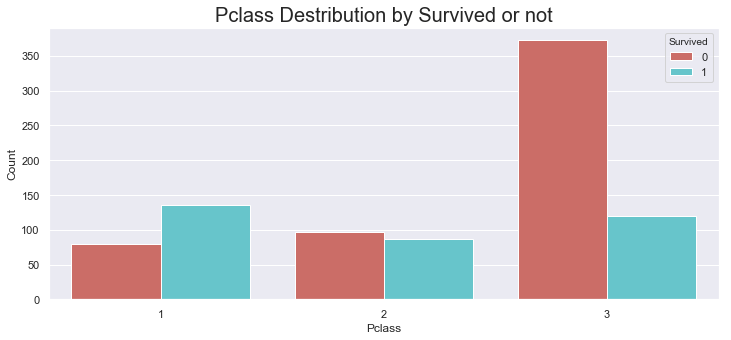

In [63]:
print(pd.crosstab(df_train['Pclass'], df_train['Survived']))

plt.figure(figsize=(12, 5))

sns.countplot(x='Pclass', data=df_train, hue='Survived', palette='hls')
plt.title('Pclass Destribution by Survived or not', fontsize=20)
plt.xlabel('Pclass', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

In [64]:
df_train['surv'] = df_train['Survived'].map({0: 'deed', 1: 'surv'})

surv    deed  surv
Pclass            
1         80   136
2         97    87
3        372   119


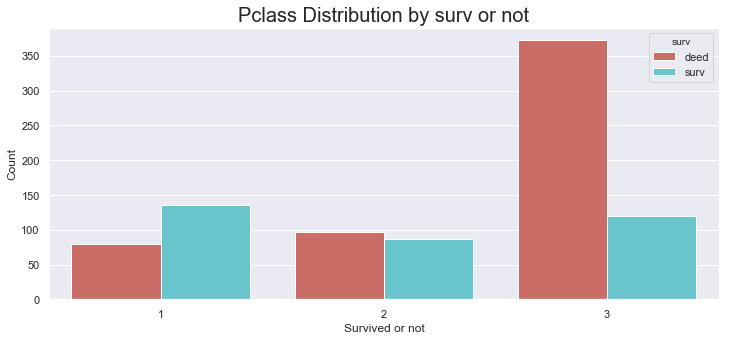

In [65]:
print(pd.crosstab(df_train['Pclass'], df_train['surv']))

plt.figure(figsize=(12, 5))

sns.countplot(x='Pclass', hue='surv', data=df_train, palette='hls')
plt.title('Pclass Distribution by surv or not', fontsize=20)
plt.xlabel('Survived or not', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

In [66]:
def kesson_table(df):
    null_val = df.isnull().sum().sort_values(ascending=False)
    percent = (100 * null_val / len(df)).sort_values(ascending=False)
    kesson_table = pd.concat([null_val, percent], axis=1, keys=['Total', 'Percent'])
    return kesson_table

In [67]:
kesson_table(df_train)
kesson_table(df_test)

,Total,Percent
Age,86,20.574163
Cabin,327,78.229665
Embarked,0,0.000000
Fare,1,0.239234
Name,0,0.000000
Parch,0,0.000000
PassengerId,0,0.000000
Pclass,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000


In [68]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())
df_train['Embarked'] = df_train['Embarked'].fillna('S')

kesson_table(df_train)

,Total,Percent
Age,0,0.000000
Cabin,687,77.104377
Embarked,0,0.000000
Fare,0,0.000000
Name,0,0.000000
Parch,0,0.000000
PassengerId,0,0.000000
Pclass,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000


In [69]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surv
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,deed
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,surv
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,surv
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,surv
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,deed
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,deed
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,deed
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,deed
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,surv
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,surv


df_test['Fare'] = df_test['Fare'].fillna(-0.5)

quant = (-1, 0, 8, 15, 31, 1000)
label_quants = ['NoInf', 'quart_1', 'quart_2', 'quart_3', 'quart_4']

df_test['Fare_cat'] = pd.cut(df_test['Fare'], quant, labels=label_quants)

In [70]:
df_train['Fare'] = df_train['Fare'].fillna(-0.5)

quant = (-1, 0, 8, 15, 31, 1000)
label_quants = ['NoInf', 'quart_1', 'quart_2', 'quart_3', 'quart_4']

df_train['Fare'] = pd.cut(df_train['Fare'], quant, labels=label_quants)

In [71]:
interval = (0, 5, 12, 18, 24, 60, 120)
label_interbal = ['baby', 'child', 'yaung', 'student', 'adult', 'senior']

df_train['Age'] = pd.cut(df_train['Age'], interval, labels=label_interbal)

In [72]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surv
0,1,0,3,"Braund, Mr. Owen Harris",male,student,1,0,A/5 21171,quart_1,NaN,S,deed
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,adult,1,0,PC 17599,quart_4,C85,C,surv
2,3,1,3,"Heikkinen, Miss. Laina",female,adult,0,0,STON/O2. 3101282,quart_1,NaN,S,surv
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,adult,1,0,113803,quart_4,C123,S,surv
4,5,0,3,"Allen, Mr. William Henry",male,adult,0,0,373450,quart_2,NaN,S,deed
5,6,0,3,"Moran, Mr. James",male,adult,0,0,330877,quart_2,NaN,Q,deed
6,7,0,1,"McCarthy, Mr. Timothy J",male,adult,0,0,17463,quart_4,E46,S,deed
7,8,0,3,"Palsson, Master. Gosta Leonard",male,baby,3,1,349909,quart_3,NaN,S,deed
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,adult,0,2,347742,quart_2,NaN,S,surv
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,yaung,1,0,237736,quart_3,NaN,C,surv


In [73]:
df_train['family'] = df_train['SibSp'] * df_train['Parch']

In [74]:
Drop = ['Name', 'SibSp', 'Parch', 'Ticket', 'surv']

df_train.drop(Drop, axis=1, inplace=True)

In [75]:
df_train.drop(['Cabin'], axis=1, inplace=True)

In [76]:
df_train = pd.get_dummies(df_train, columns=['Sex', 'Age', 'Fare', 'Embarked'],
                          prefix=['Sex', 'Age', 'Fare', 'Emb'], drop_first=True)

In [77]:
df_train['Pclass'] = df_train['Pclass'].map({1:3, 2:2, 3:1})

In [78]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [79]:
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())

In [80]:
display(df_test[df_test['Fare'].isnull()])

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [81]:
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())

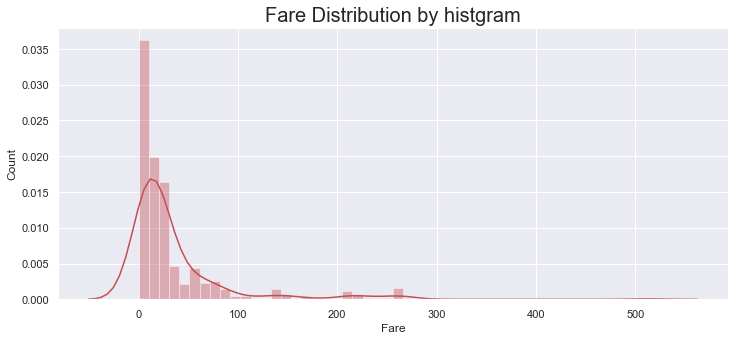

In [82]:
plt.figure(figsize=(12, 5))

sns.distplot(df_test['Fare'], bins=50, color='r')
plt.title('Fare Distribution by histgram', fontsize=20)
plt.xlabel('Fare', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

In [83]:
df_test['Fare'].describe()

count    418.000000
mean      35.576535
std       55.850103
min        0.000000
25%        7.895800
50%       14.454200
75%       31.471875
max      512.329200
Name: Fare, dtype: float64

In [84]:
interval = (-1, 0, 8, 15, 31, 1000)
label_name = ['NoInfo', 'fare_1', 'fare_2', 'fare_3', 'fare_4']

df_test['Fare'] = pd.cut(df_test['Fare'], interval, labels=label_name)

In [85]:
interval = (0, 5, 12, 18, 24, 60, 120)
label_name = ['baby', 'child', 'yaung', 'student', 'adult', 'senior']

df_test['Age'] = pd.cut(df_test['Age'], interval, labels=label_name)

In [86]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,adult,0,0,330911,fare_1,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,adult,1,0,363272,fare_1,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,senior,0,0,240276,fare_2,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,adult,0,0,315154,fare_2,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,student,1,1,3101298,fare_2,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,yaung,0,0,7538,fare_2,NaN,S
6,898,3,"Connolly, Miss. Kate",female,adult,0,0,330972,fare_1,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,adult,1,1,248738,fare_3,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,yaung,0,0,2657,fare_1,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,student,2,0,A/4 48871,fare_3,NaN,S


In [87]:
df_test['Pclass'] = df_test['Pclass'].map({1:3, 2:2, 3:1})

In [88]:
df_test['family'] = df_test['SibSp'] * df_test['Parch']

In [89]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
family           0
dtype: int64

In [90]:
Drop = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin']
df_test.drop(Drop, axis=1, inplace=True)

In [91]:
df_test.head()

,Pclass,Sex,Age,Fare,Embarked,family
0,1,male,adult,fare_1,Q,0
1,1,female,adult,fare_1,S,0
2,2,male,senior,fare_2,Q,0
3,1,male,adult,fare_2,S,0
4,1,female,student,fare_2,S,1


In [92]:
df_test = pd.get_dummies(df_test, columns=['Sex', 'Age', 'Fare', 'Embarked'],
                         prefix=['Sex', 'Age', 'Fare', 'Emb'], drop_first=True)

In [93]:
df_test.head()

,Pclass,family,Sex_male,Age_child,Age_yaung,Age_student,Age_adult,Age_senior,Fare_fare_1,Fare_fare_2,Fare_fare_3,Fare_fare_4,Emb_Q,Emb_S
0,1,0,1,0,0,0,1,0,1,0,0,0,1,0
1,1,0,0,0,0,0,1,0,1,0,0,0,0,1
2,2,0,1,0,0,0,0,1,0,1,0,0,1,0
3,1,0,1,0,0,0,1,0,0,1,0,0,0,1
4,1,1,0,0,0,1,0,0,0,1,0,0,0,1


In [94]:
print(df_train.shape, df_test.shape)

(891, 16) (418, 14)


In [95]:
df_train.head()

,PassengerId,Survived,Pclass,family,Sex_male,Age_child,Age_yaung,Age_student,Age_adult,Age_senior,Fare_quart_1,Fare_quart_2,Fare_quart_3,Fare_quart_4,Emb_Q,Emb_S
0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1
1,2,1,3,0,0,0,0,0,1,0,0,0,0,1,0,0
2,3,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1
3,4,1,3,0,0,0,0,0,1,0,0,0,0,1,0,1
4,5,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1


In [96]:
train = df_train.drop(['Survived', 'PassengerId'], axis=1)
train_ = df_train['Survived']

test_ = df_test

X_train = train.values
y_train = train_.values

X_test = test_.values
X_test = X_test.astype(np.float, copy=False)

In [97]:
print(X_train.shape, X_test.shape, y_train.shape)

(891, 14) (418, 14) (891,)


In [98]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [99]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import keras
from keras.optimizers import Adam
import graphviz

In [103]:
model = Sequential()

model.add(Dense(6, activation='relu', input_dim=14,kernel_initializer='uniform'))
model.add(Dropout(0.30))
model.add(Dense(20, activation='relu', kernel_initializer='uniform'))
model.add(Dropout(0.30))
model.add(Dense(1, activation='sigmoid', kernel_initializer='uniform'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 6)                 90        
_________________________________________________________________
dropout_9 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_14 (Dense)             (None, 20)                140       
_________________________________________________________________
dropout_10 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 21        
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


In [113]:
adam = Adam(lr=0.001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=70, epochs=50, verbose=2)

Epoch 1/50
 - 1s - loss: 0.4256 - acc: 0.8058
Epoch 2/50
 - 0s - loss: 0.4074 - acc: 0.8361
Epoch 3/50
 - 0s - loss: 0.4039 - acc: 0.8316
Epoch 4/50
 - 0s - loss: 0.4296 - acc: 0.8159
Epoch 5/50
 - 0s - loss: 0.4236 - acc: 0.8182
Epoch 6/50
 - 0s - loss: 0.4188 - acc: 0.8103
Epoch 7/50
 - 0s - loss: 0.4241 - acc: 0.8272
Epoch 8/50
 - 0s - loss: 0.4334 - acc: 0.8159
Epoch 9/50
 - 0s - loss: 0.4276 - acc: 0.8204
Epoch 10/50
 - 0s - loss: 0.4241 - acc: 0.8227
Epoch 11/50
 - 0s - loss: 0.4131 - acc: 0.8249
Epoch 12/50
 - 0s - loss: 0.4345 - acc: 0.8126
Epoch 13/50
 - 0s - loss: 0.4252 - acc: 0.8249
Epoch 14/50
 - 0s - loss: 0.4212 - acc: 0.8204
Epoch 15/50
 - 0s - loss: 0.4238 - acc: 0.8215
Epoch 16/50
 - 0s - loss: 0.4298 - acc: 0.8137
Epoch 17/50
 - 0s - loss: 0.4188 - acc: 0.8260
Epoch 18/50
 - 0s - loss: 0.4140 - acc: 0.8182
Epoch 19/50
 - 0s - loss: 0.4240 - acc: 0.8137
Epoch 20/50
 - 0s - loss: 0.4199 - acc: 0.8283
Epoch 21/50
 - 0s - loss: 0.4253 - acc: 0.8159
Epoch 22/50
 - 0s - lo

In [114]:
scores = model.evaluate(X_train, y_train, batch_size=40)
print('%s : %.2f%%' % (model.metrics_names[1], scores[1]*100))

891/891 [==============================] - 0s 471us/step
acc : 84.40%


In [106]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=180, batch_size=30, verbose=0)
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


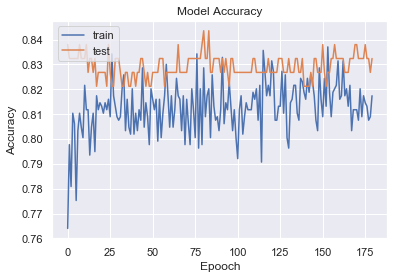

In [107]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epooch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

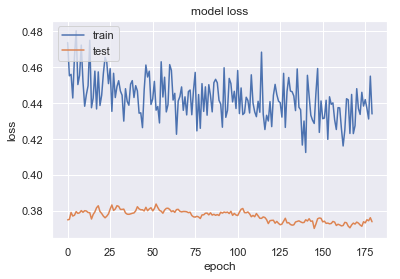

In [108]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#predict = np.round(model.predict(X_test))

In [119]:
predict = np.round(model.predict(X_test))

df_out = pd.read_csv('../data/titanic/test.csv')
df_out['Survived'] = predict
df_out['Survived'] = df_out['Survived'].map({0: 1, 1: 0})
df_out['Survived'] = df_out['Survived'].map({0: 1, 1: 0})

df_out[["PassengerId","Survived"]].to_csv("../data/titanic/output/submission.csv",index=False)

TypeError: only size-1 arrays can be converted to Python scalars

In [118]:
from sklearn import svm

svm = svm.LinearSVC()
svm.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [119]:


predict = svm.predict(X_test)

df_out = pd.read_csv('../data/titanic/test.csv')
df_out['Survived'] = predict

df_out[["PassengerId","Survived"]].to_csv("../data/titanic/output/submission.csv",index=False)